In [11]:
import pandas as pd
from rdkit import Chem


In [12]:
data = pd.read_csv('../data/SAMPL.csv')

In [13]:
data['rdkit_mol'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
data.head()

,iupac,smiles,expt,calc,rdkit_mol
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625,<rdkit.Chem.rdchem.Mol object at 0x7f0856b41850>
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219,<rdkit.Chem.rdchem.Mol object at 0x7f0856b418c0>
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452,<rdkit.Chem.rdchem.Mol object at 0x7f0856b41930>
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809,<rdkit.Chem.rdchem.Mol object at 0x7f0856b419a0>
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917,<rdkit.Chem.rdchem.Mol object at 0x7f0856b41a10>


In [14]:
data['no_atoms'] = data['rdkit_mol'].apply(lambda x: len(Chem.AddHs(x).GetAtoms()))
data.head()

,iupac,smiles,expt,calc,rdkit_mol,no_atoms
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625,<rdkit.Chem.rdchem.Mol object at 0x7f0856b41850>,26
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219,<rdkit.Chem.rdchem.Mol object at 0x7f0856b418c0>,8
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452,<rdkit.Chem.rdchem.Mol object at 0x7f0856b41930>,15
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809,<rdkit.Chem.rdchem.Mol object at 0x7f0856b419a0>,16
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917,<rdkit.Chem.rdchem.Mol object at 0x7f0856b41a10>,24


<Axes: ylabel='Frequency'>

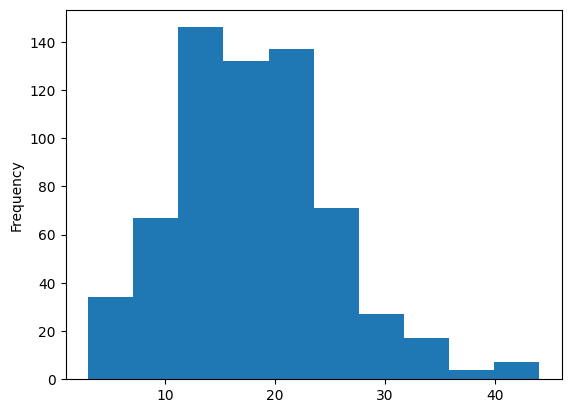

In [15]:
data['no_atoms'].plot(kind='hist')

In [16]:
data['no_atoms'].describe()

count    642.000000
mean      18.088785
std        7.129944
min        3.000000
25%       13.000000
50%       17.000000
75%       22.000000
max       44.000000
Name: no_atoms, dtype: float64

<Axes: xlabel='calc', ylabel='expt'>

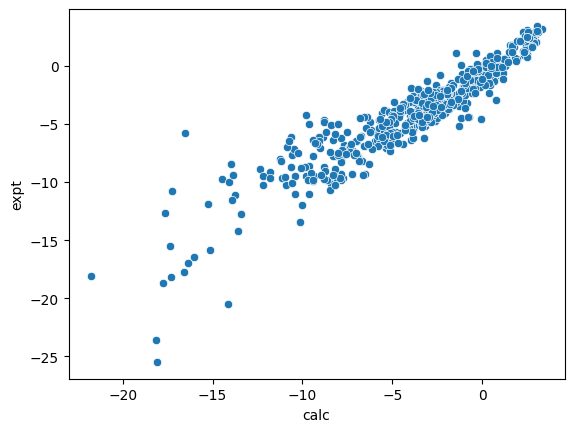

In [17]:
import seaborn as sns

sns.scatterplot(x='calc', y='expt', data=data)

In [18]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

calc_mae = mean_absolute_error(data['expt'], data['calc'])
calc_rmse = root_mean_squared_error(data['expt'], data['calc'])
calc_r2score = r2_score(data['expt'], data['calc'])

print(f'MAE: {calc_mae:.2f}')
print(f'RMSE: {calc_rmse:.2f}')
print(f'R²: {calc_r2score:.2f}')


MAE: 1.11
RMSE: 1.54
R²: 0.84


In [19]:
train_df = pd.read_csv('../data/train.csv')

train_mae = mean_absolute_error(train_df['expt'], train_df['calc'])
train_rmse = root_mean_squared_error(train_df['expt'], train_df['calc'])
train_r2score = r2_score(train_df['expt'], train_df['calc'])

print(f'MAE: {train_mae:.2f}')
print(f'RMSE: {train_rmse:.2f}')
print(f'R²: {train_r2score:.2f}')

MAE: 1.10
RMSE: 1.50
R²: 0.85


<Axes: ylabel='Frequency'>

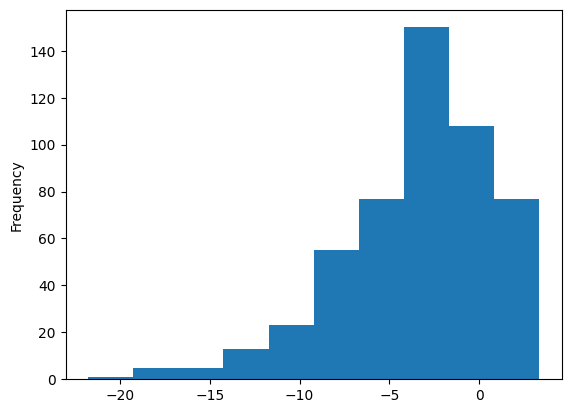

In [21]:
train_df['calc'].plot(kind='hist')

In [20]:
test_df = pd.read_csv('../data/test.csv')

test_mae = mean_absolute_error(test_df['expt'], test_df['calc'])
test_rmse = root_mean_squared_error(test_df['expt'], test_df['calc'])
test_r2score = r2_score(test_df['expt'], test_df['calc'])

print(f'MAE: {test_mae:.2f}')
print(f'RMSE: {test_rmse:.2f}')
print(f'R²: {test_r2score:.2f}')

MAE: 1.18
RMSE: 1.71
R²: 0.79


<Axes: ylabel='Frequency'>

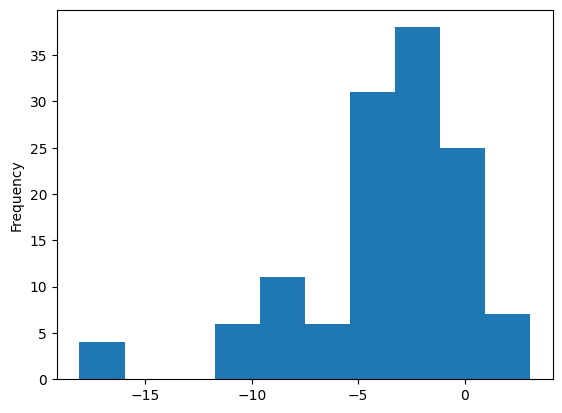

In [22]:
test_df['calc'].plot(kind='hist')